<a href="https://colab.research.google.com/github/paulo-pires/bank8service/blob/main/YOLOv4-DeepSORT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! nvidia-smi
! /usr/local/cuda/bin/nvcc --version

# Running DeepSort Object Tracking with YOLO Object Detections in Google Colab!
This tutorial will help you run DeepSort Object tracking on Colab GPU with YOLOv4 Object Detections.

Object tracking implemented with YOLOv4, DeepSort, and TensorFlow. YOLOv4 is a state of the art algorithm that uses deep convolutional neural networks to perform object detections. We can take the output of YOLOv4 feed these object detections into Deep SORT (Simple Online and Realtime Tracking with a Deep Association Metric) in order to create a highly accurate object tracker.

**Original code :** https://github.com/nwojke/deep_sort by [Nicolai Wojke](https://github.com/nwojke)

**Colab Notebook Original code :** https://github.com/theAIGuysCode/yolov4-deepsort by [@The AI Guy](https://github.com/theAIGuysCode)

### Citation - DeepSORT
```
@inproceedings{Wojke2017simple,
  title={Simple Online and Realtime Tracking with a Deep Association Metric},
  author={Wojke, Nicolai and Bewley, Alex and Paulus, Dietrich},
  booktitle={2017 IEEE International Conference on Image Processing (ICIP)},
  year={2017},
  pages={3645--3649},
  organization={IEEE},
  doi={10.1109/ICIP.2017.8296962}
}

@inproceedings{Wojke2018deep,
  title={Deep Cosine Metric Learning for Person Re-identification},
  author={Wojke, Nicolai and Bewley, Alex},
  booktitle={2018 IEEE Winter Conference on Applications of Computer Vision (WACV)},
  year={2018},
  pages={748--756},
  organization={IEEE},
  doi={10.1109/WACV.2018.00087}
}
```

## Step 1: Enabling GPU within your notebook
You will want to enable GPU acceleration within your Colab notebook so that your object tracker will be able to process detections over 100 times faster than if it were on CPU.

### Steps:

### i) Click **Edit** at top left of your notebook
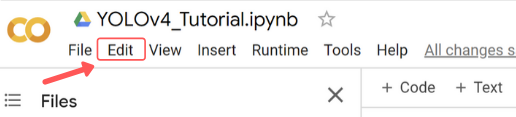
### ii) Click **Notebook Settings** within dropdown
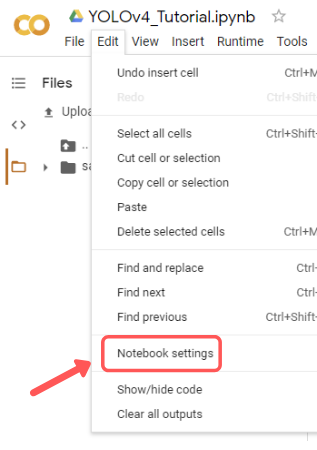
### iii) Under 'Hardware Accelerator' select **GPU** and then hit **Save**
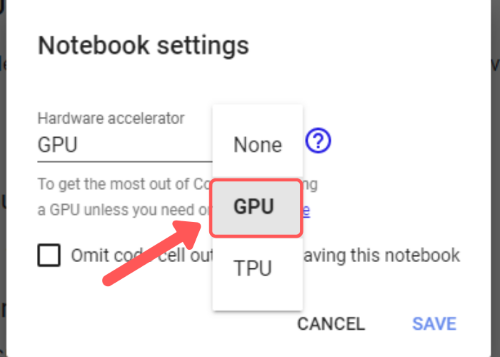

Your notebook should now have GPU enabled!

## Step 2: Cloning the Repository
The following cell will clone the yolov4-deepsort repository from github, to enable the rest of the tutorial and grab the code.

In [ ]:
# clone repository for deepsort with yolov4
! git clone https://github.com/hardik0/yolov4-deepsort
%cd yolov4-deepsort/

## Step 3: Install Dependencies
Google Colab should have all the necessary dependencies installed already within your notebook. I have left this section here as a backup plan if for some reason you run into any dependency issues while running DeepSort.

In [ ]:
# uncomment below line ONLY if you run into any dependency issues while following tutorial
#!pip install -r requirements-gpu.txt

## Step 4: Get YOLOv4 Pre-trained Weights
For this tutorial we will be using the pre-trained YOLOv4 model, trained on over 80 classes.

In [ ]:
# download yolov4 model weights to data folder
! wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights -P data/

## Step 5: Convert YOLOv4 Darknet Weights to TensorFlow model
We will be running the DeepSort object tracker using TensorFlow. In order to accomplish this we must first convert the yolov4 weights into a tensorflow model.

In [ ]:
# Convert darknet weights to tensorflow model
! python save_model.py --model yolov4

Pedestrians Compilation - WriuvU1rXkc

Pedestrian street, ISRAEL - tTko7jTWRME

Sysvideo traffic - eO19UTm93GQ

Traffic Monitoring (Road, Interchage) - PSf09R3D7Lo

Traffic Monitoring (2 Lane Road) - jjlBnrzSGjc

 Panasonic Office in Japan (Pedestrian+Vehicle) - 6rgEyQ9YFh8

4K Road traffic video for object detection and tracking - MNn9qKG2UFI

Road traffic for object recognition (30+ min) - wqctLW0Hb_0


In [ ]:
!pip install youtube-dl
from IPython.display import YouTubeVideo

YOUTUBE_ID = 'WriuvU1rXkc'

YouTubeVideo(YOUTUBE_ID)

In [ ]:
#!rm -rf youtube.mp4
# download the youtube with the given ID
!youtube-dl -f 22 --output "ped_track.%(ext)s" https://www.youtube.com/watch?v=$YOUTUBE_ID
#!youtube-dl -f 'bestvideo[ext=mp4]' --output "youtube.%(ext)s" https://www.youtube.com/watch?v=$YOUTUBE_ID


# cut the first 10 seconds
#!ffmpeg -y -loglevel info -i youtube.mp4 -t 10 pedestrian.mp4

[youtube] WriuvU1rXkc: Downloading webpage
[download] Destination: ped_track.mp4
[download] 100% of 73.60MiB in 00:09


## Step 6: Running DeepSort with YOLOv4

Let the fun begin! You can now run your object tracker. Unfortunately Google Colab doesn't support displaying video while its being processed. So we will be suppressing the output of the object tracker as it runs and then we will display the entire video once it has finished processing.

In [ ]:
# run DeepSort with YOLOv4 Object Detections as backbone
! python object_tracker.py --video ped_track.mp4 --output ./outputs/ped_car_tracker.avi --model yolov4 --dont_show --count

Total number of frames:  302
100% 302/302 [00:38<00:00,  8.11it/s]
 Video has ended or failed, try a different video format!
100% 302/302 [00:38<00:00,  7.76it/s]


In [ ]:
# run DeepSort with YOLOv4 Object Detections as backbone
! python object_tracker.py --video data/video/test.mp4 --output ./outputs/tracker.avi --model yolov4 --dont_show --count

In [ ]:
# define helper function to display videos
import io
from IPython.display import HTML
from base64 import b64encode
def show_video(file_name, width=640):
  # show resulting deepsort video
  mp4 = open(file_name,'rb').read()
  data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
  return HTML("""
  <video width="{0}" controls>
        <source src="{1}" type="video/mp4">
  </video>
  """.format(width, data_url))

In [ ]:
# convert resulting video from avi to mp4 file format
import os
path_video = os.path.join("outputs","tracker.avi")
%cd outputs/
!ffmpeg -y -loglevel panic -i tracker.avi output.mp4
%cd ..

# output object tracking video
path_output = os.path.join("outputs","output.mp4")
show_video(path_output, width=960)

/content/yolov4-deepsort/outputs
/content/yolov4-deepsort


To access Google Drive Folder and Files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Copy video to google drive | download video from file browser (optional)

In [ ]:
%mkdir '../drive/My Drive/Colab Notebooks/MOT/YOLOv4_DeepSORT'
%cp -r outputs/ped_car_tracker_output.mp4 '../drive/My Drive/Colab Notebooks/MOT/YOLOv4_DeepSORT/'
%ls '../drive/My Drive/Colab Notebooks/MOT/YOLOv4_DeepSORT/'

ped_car_tracker_output.mp4


## Bonus: Running DeepSort on Specific Classes (filter out unwanted classes)
You may not want to run your object tracker on all 80+ classes that the pre-trained YOLOv4 model is trained on. We can edit a couple lines of code in the object_tracker.py file to allow only certain classes to be tracked.

See what classes are available in pre-trained model: [COCO CLASSES](http://cocodataset.org/#explore)

To pick which classes to track, open object_tracker.py file by double clicking on it in the Files section of your notebook.

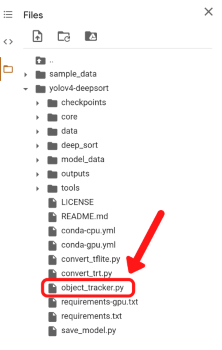

Scroll down to lines 168-171. Comment out line 168 and uncomment line 171, changing the list by adding any of the class names to the list in a comma separated fashion.

Below example would only allow object tracking of 'person's and 'car's.

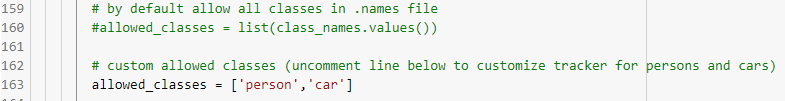

For the example I will show you, I have only allowed the class 'car's.

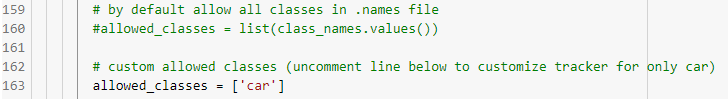

Now let's run the object tracker on a different video to test it out.

In [ ]:
# run object tracker on video of cars
!python object_tracker.py --video ./data/video/cars.mp4 --output ./outputs/custom.avi --model yolov4 --dont_show

Total number of frames:  266
100% 265/266 [00:27<00:00, 11.56it/s]Video has ended or failed, try a different video format!
100% 266/266 [00:28<00:00,  9.38it/s]


In [ ]:
# convert resulting video from avi to mp4 file format
path_video = os.path.join("outputs","custom.avi")
%cd outputs/
!ffmpeg -y -loglevel panic -i custom.avi result.mp4
%cd ..

# output object tracking video
path_output = os.path.join("outputs","result.mp4")
show_video(path_output, width=960)

/content/yolov4-deepsort/outputs
/content/yolov4-deepsort
